In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2025-09-18 10:26:43.915770: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-18 10:26:44.173635: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-18 10:26:44.396773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758171404.640855    4606 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758171404.692382    4606 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758171405.161811    4606 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(len(X_train), 28, 28, 1) / 255.0
X_test = X_test.reshape(len(X_test), 28, 28, 1) / 255.0

In [4]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (60000, 28, 28, 1)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of Y_test: (10000,)


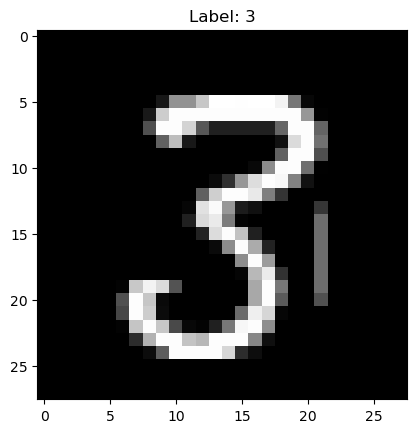

In [6]:
idx = random.randint(0, len(X_train)-1)
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.title(f"Label: {Y_train[idx]}")
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/home/student/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-18 10:28:15.116761: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


2025-09-18 10:34:35.451785: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


  1/750 ━━━━━━━━━━━━━━━━━━━━ 31:26 3s/step - accuracy: 0.0781 - loss: 2.2976

2025-09-18 10:34:38.082049: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2025-09-18 10:34:38.110092: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2025-09-18 10:34:38.210750: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.9462 - loss: 0.1747 - val_accuracy: 0.9811 - val_loss: 0.0642
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 72ms/step - accuracy: 0.9838 - loss: 0.0518 - val_accuracy: 0.9838 - val_loss: 0.0548
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.9882 - loss: 0.0361 - val_accuracy: 0.9880 - val_loss: 0.0427
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 98ms/step - accuracy: 0.9915 - loss: 0.0262 - val_accuracy: 0.9887 - val_loss: 0.0367
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 93s 113ms/step - accuracy: 0.9936 - loss: 0.0196 - val_accuracy: 0.9896 - val_loss: 0.0381


In [13]:
loss, acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9906 - loss: 0.0276
Test Accuracy: 0.9906


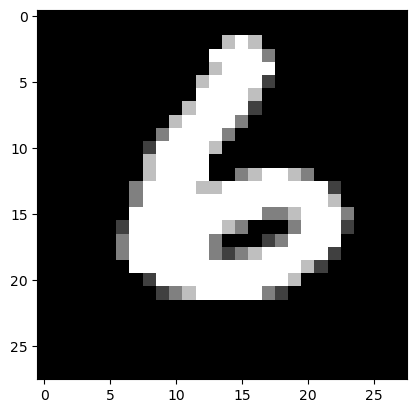

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Our model says it is a: 6
True label is: 6


In [14]:
idx2 = random.randint(0, len(X_test)-1)
plt.imshow(X_test[idx2].reshape(28,28), cmap='gray')
plt.show()
y_pred = model.predict(X_test[idx2].reshape(1, 28, 28, 1))
pred_label = np.argmax(y_pred)
print("Our model says it is a:", pred_label)
print("True label is:", Y_test[idx2])